In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set display settings

pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)

In [3]:
# specify columns, datatypes, and load full consolidated sdss dataset

# load column names from file into a list
sdss_headers = pd.read_csv('../data/processed/sdss_full.csv.gz', compression='gzip', header=0, index_col=0, nrows=0).columns.tolist()

# specify groups of columns
object_identifiers = ['dr7objid', 'dr8objid', 'specobjid', 'gz2_filenumber']
object_locations = ['ra', 'dec']
object_class_labels = ['sdss_clean_class_name', 'sdss_clean_subclass_name', 'gz2_subclass_name', 'elodie_spectral_type']
object_binary_labels = [label for label in sdss_headers if 'flag' in label]
object_filters = ['score', 'petroR90_r']
object_features = ['redshift_final', 'redshift_noqso', 'redshift_elodie',
                   'u_s', 'g_s', 'r_s', 'i_s', 'z_s',
                   'u_p', 'g_p', 'r_p', 'i_p', 'z_p',
                   'elodie_color_index', 'elodie_temperature', 'elodie_metallicity']

# create a datatype dictionary for object_identifiers
object_dtypes = {col: 'string' for col in object_identifiers}

# load full consolidated sdss dataset
sdss_full = pd.read_csv('../data/processed/sdss_full.csv.gz', compression='gzip', header=0, dtype=object_dtypes)

/tmp/ipykernel_14617/3708292460.py:21: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  sdss_full = pd.read_csv('../data/processed/sdss_full.csv.gz', compression='gzip', header=0, dtype=object_dtypes)


In [4]:
# inspect the imported data
 
 # display some data
display(sdss_full.head(3))
display(sdss_full.tail(3))
display(sdss_full.sample(10))
 
# inspect dataframe
print(sdss_full.shape)
print(sdss_full.info())
for identifier in object_identifiers:
    print(f"\nTop Value Counts:  {sdss_full[identifier].value_counts().nlargest(5)}")

,dr7objid,dr8objid,specobjid,gz2_filenumber,ra,dec,sdss_clean_class_name,sdss_clean_subclass_name,gz2_subclass_name,elodie_spectral_type,gz1_flag_spiral,gz1_flag_elliptical,gz1_flag_uncertain,gz2_flag_smooth,gz2_flag_features_or_disk,gz2_flag_star_or_artifact,gz2_flag_edgeon_yes,gz2_flag_edgeon_no,gz2_flag_bar_yes,gz2_flag_bar_no,gz2_flag_spiral_yes,gz2_flag_spiral_no,gz2_flag_bulge_none1,gz2_flag_bulge_small,gz2_flag_bulge_medium,gz2_flag_bulge_large,gz2_flag_odd_yes,gz2_flag_odd_no,gz2_flag_round_circular,gz2_flag_round_medium,gz2_flag_round_cigar,gz2_flag_feature_ring,gz2_flag_feature_lens_or_arc,gz2_flag_feature_disturbed,gz2_flag_feature_irregular,gz2_flag_feature_other,gz2_flag_feature_merger,gz2_flag_feature_dust_lane,gz2_flag_bulge_round,gz2_flag_bulge_boxy,gz2_flag_bulge_none2,gz2_flag_arms_tight,gz2_flag_arms_medium,gz2_flag_arms_loose,gz2_flag_arms_1,gz2_flag_arms_2,gz2_flag_arms_3,gz2_flag_arms_4,gz2_flag_arms_many,gz2_flag_arms_unsure,score,petroR90_r,redshift_final,redshift_noqso,redshift_elodie,u_s,g_s,r_s,i_s,z_s,u_p,g_p,r_p,i_p,z_p,elodie_color_index,elodie_temperature,elodie_metallicity
0,588007006336254064,1237651252584448100,693716010653476864,192933,236.355530,54.820911,galaxy,STARFORMING,SBc2l,unclassified,True,False,False,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.850861,10.064850,0.080127,0.0,0.0,6.013997,19.66714,43.23034,61.21994,73.57887,18.91253,17.53665,16.81467,16.43992,16.18453,NaN,NaN,NaN
1,588007006336254083,1237651252584448112,693718759432546304,<NA>,236.342000,54.802830,galaxy,unclassified,unclassified,unclassified,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850861,6.995347,0.193371,0.0,0.0,4.234163,11.95987,31.28475,46.43085,56.40972,19.66911,18.16584,17.27259,16.84296,16.55850,NaN,NaN,NaN
2,587729226614112406,1237651252584251555,693718209676732416,32264,235.891464,55.133472,galaxy,AGN,SBc?t,unclassified,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.863360,10.959250,0.040399,0.0,0.0,18.203950,60.73151,129.97640,179.21480,215.18610,17.46699,15.83618,15.09113,14.70903,14.41906,NaN,NaN,NaN


,dr7objid,dr8objid,specobjid,gz2_filenumber,ra,dec,sdss_clean_class_name,sdss_clean_subclass_name,gz2_subclass_name,elodie_spectral_type,gz1_flag_spiral,gz1_flag_elliptical,gz1_flag_uncertain,gz2_flag_smooth,gz2_flag_features_or_disk,gz2_flag_star_or_artifact,gz2_flag_edgeon_yes,gz2_flag_edgeon_no,gz2_flag_bar_yes,gz2_flag_bar_no,gz2_flag_spiral_yes,gz2_flag_spiral_no,gz2_flag_bulge_none1,gz2_flag_bulge_small,gz2_flag_bulge_medium,gz2_flag_bulge_large,gz2_flag_odd_yes,gz2_flag_odd_no,gz2_flag_round_circular,gz2_flag_round_medium,gz2_flag_round_cigar,gz2_flag_feature_ring,gz2_flag_feature_lens_or_arc,gz2_flag_feature_disturbed,gz2_flag_feature_irregular,gz2_flag_feature_other,gz2_flag_feature_merger,gz2_flag_feature_dust_lane,gz2_flag_bulge_round,gz2_flag_bulge_boxy,gz2_flag_bulge_none2,gz2_flag_arms_tight,gz2_flag_arms_medium,gz2_flag_arms_loose,gz2_flag_arms_1,gz2_flag_arms_2,gz2_flag_arms_3,gz2_flag_arms_4,gz2_flag_arms_many,gz2_flag_arms_unsure,score,petroR90_r,redshift_final,redshift_noqso,redshift_elodie,u_s,g_s,r_s,i_s,z_s,u_p,g_p,r_p,i_p,z_p,elodie_color_index,elodie_temperature,elodie_metallicity
1654165,<NA>,1237658613593997533,9259471051523641344,<NA>,177.50007,50.211641,quasar,unclassified,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.807279,NaN,1.076416,0.231599,0.0,0.765539,1.052253,1.874948,1.917074,2.357079,21.84895,21.91097,21.59686,21.60826,21.09701,0.0,0.0,0.0
1654166,<NA>,1237658613594063054,9259459231773642752,<NA>,177.79391,50.208232,unclassified,unclassified,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819832,NaN,2.060357,-0.004214,0.0,7.819283,5.829438,6.240019,6.629135,8.703038,20.83662,20.68300,20.50494,20.39749,20.39611,0.0,0.0,0.0
1654167,<NA>,1237658613594063058,9259460331285270528,<NA>,177.79678,50.375821,quasar,BROADLINE,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819832,NaN,1.856644,0.123349,0.0,0.191132,1.780057,1.906872,2.832188,3.034446,22.02470,21.56175,21.59132,21.17899,21.09313,0.0,0.0,0.0


,dr7objid,dr8objid,specobjid,gz2_filenumber,ra,dec,sdss_clean_class_name,sdss_clean_subclass_name,gz2_subclass_name,elodie_spectral_type,gz1_flag_spiral,gz1_flag_elliptical,gz1_flag_uncertain,gz2_flag_smooth,gz2_flag_features_or_disk,gz2_flag_star_or_artifact,gz2_flag_edgeon_yes,gz2_flag_edgeon_no,gz2_flag_bar_yes,gz2_flag_bar_no,gz2_flag_spiral_yes,gz2_flag_spiral_no,gz2_flag_bulge_none1,gz2_flag_bulge_small,gz2_flag_bulge_medium,gz2_flag_bulge_large,gz2_flag_odd_yes,gz2_flag_odd_no,gz2_flag_round_circular,gz2_flag_round_medium,gz2_flag_round_cigar,gz2_flag_feature_ring,gz2_flag_feature_lens_or_arc,gz2_flag_feature_disturbed,gz2_flag_feature_irregular,gz2_flag_feature_other,gz2_flag_feature_merger,gz2_flag_feature_dust_lane,gz2_flag_bulge_round,gz2_flag_bulge_boxy,gz2_flag_bulge_none2,gz2_flag_arms_tight,gz2_flag_arms_medium,gz2_flag_arms_loose,gz2_flag_arms_1,gz2_flag_arms_2,gz2_flag_arms_3,gz2_flag_arms_4,gz2_flag_arms_many,gz2_flag_arms_unsure,score,petroR90_r,redshift_final,redshift_noqso,redshift_elodie,u_s,g_s,r_s,i_s,z_s,u_p,g_p,r_p,i_p,z_p,elodie_color_index,elodie_temperature,elodie_metallicity
548793,587739706883964938,1237665533333864607,2475898485027661824,<NA>,240.893200,17.471560,unclassified,unclassified,unclassified,unclassified,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919174,11.579650,0.037981,0.000000,0.000000,6.235577,9.807453,14.093150,17.218750,18.482260,18.98781,17.65219,17.32133,17.09374,16.92305,NaN,NaN,NaN
1494166,<NA>,1237656242237276631,2131458045488687104,<NA>,339.877100,13.795022,star,K7,unclassified,K7V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000060,0.000000,0.000059,0.002067,4.494211,15.624670,26.074090,34.552200,22.78658,20.82668,19.50035,18.94381,18.55880,1.354,3962.0,-0.36
1653130,<NA>,1237657857680736301,988665502010206208,<NA>,169.032720,52.232109,quasar,STARBURST BROADLINE,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.860564,NaN,0.180976,0.000000,0.000000,22.343500,31.397250,54.632150,80.101630,86.449290,19.15682,18.47318,17.94714,17.52280,17.39013,0.000,0.0,0.00
850740,<NA>,1237662620263646427,5636394942240935936,<NA>,244.245780,27.095864,unclassified,unclassified,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.922788,NaN,2.258126,0.003074,0.000000,0.758906,1.395353,1.787103,2.541661,5.167331,22.70251,21.98553,21.95430,22.03572,21.57185,0.000,0.0,0.00
275141,587735241711026337,1237660962935931046,1428875332953335808,<NA>,129.644700,30.392890,galaxy,unclassified,unclassified,unclassified,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.797057,4.216802,0.063062,0.000000,0.000000,5.213577,18.143350,44.239590,71.089770,96.781230,20.46736,18.65804,17.71701,17.21655,16.85047,NaN,NaN,NaN
1216319,<NA>,1237666216220295888,5770451250824105984,<NA>,17.578246,21.081062,quasar,BROADLINE,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.874330,NaN,0.672844,0.672751,0.000000,0.305045,1.445544,2.501956,5.208925,8.317519,25.12921,22.18885,21.70169,21.11259,20.43764,0.000,0.0,0.00
920189,<NA>,1237662224602759264,9954293406711959552,<NA>,180.139530,39.558091,quasar,BROADLINE,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

(1654168, 68)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654168 entries, 0 to 1654167
Data columns (total 68 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   dr7objid                      658334 non-null   string 
 1   dr8objid                      1654168 non-null  string 
 2   specobjid                     1654168 non-null  string 
 3   gz2_filenumber                236466 non-null   string 
 4   ra                            1654168 non-null  float64
 5   dec                           1654168 non-null  float64
 6   sdss_clean_class_name         1654168 non-null  object 
 7   sdss_clean_subclass_name      1654168 non-null  object 
 8   gz2_subclass_name             1654168 non-null  object 
 9   elodie_spectral_type          1654168 non-null  object 
 10  gz1_flag_spiral               658334 non-null   object 
 11  gz1_flag_elliptical           658334 non-null   object 
 12  gz1_flag_uncer


----------sdss_clean_class_name----------
	The number of rows with empty values is: 0
	The number of unique labels is: 4
	The % of the most common labels for column: sdss_clean_class_name
galaxy          34.326380
unclassified    28.910304
star            24.431013
quasar          12.332302
Name: count, dtype: float64

----------sdss_clean_subclass_name----------
	The number of rows with empty values is: 0
	The number of unique labels is: 171
	The % of the most common labels for column: sdss_clean_subclass_name
unclassified      54.664399
STARFORMING        9.275600
BROADLINE          8.997816
F9                 3.774949
F5                 3.246889
A0                 1.914497
F3/F5V (30743)     1.720744
STARBURST          1.514417
G2                 0.983999
K3                 0.927354
Name: count, dtype: float64

----------gz2_subclass_name----------
	The number of rows with empty values is: 0
	The number of unique labels is: 815
	The % of the most common labels for column: gz2_subcl

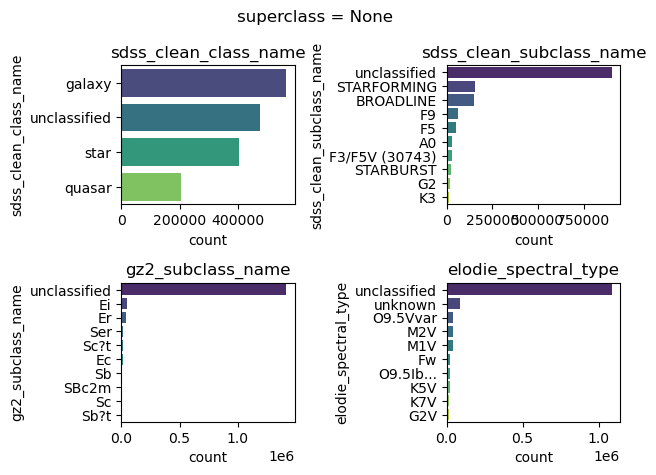

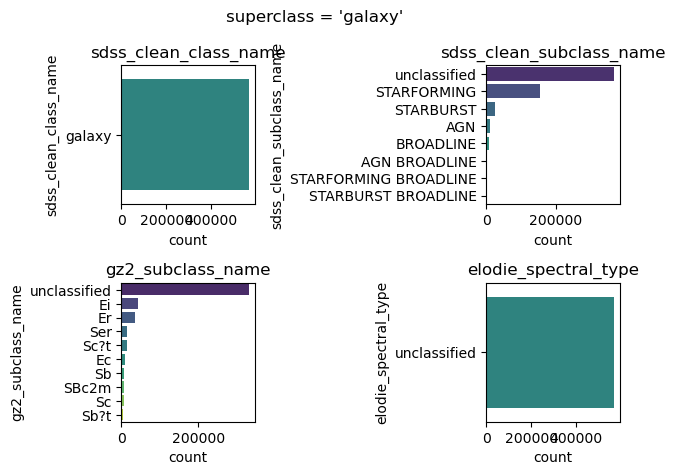

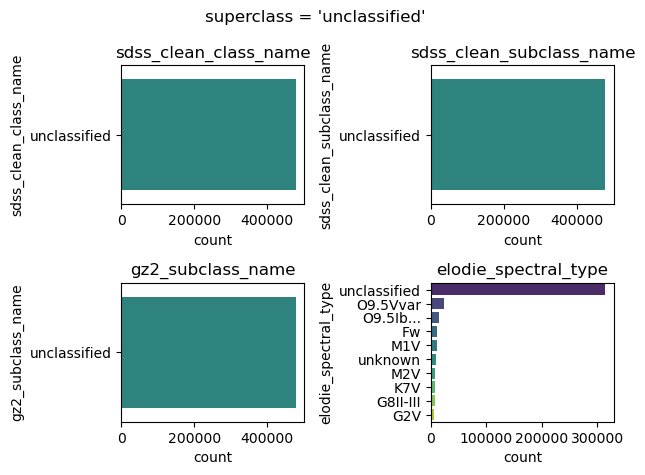

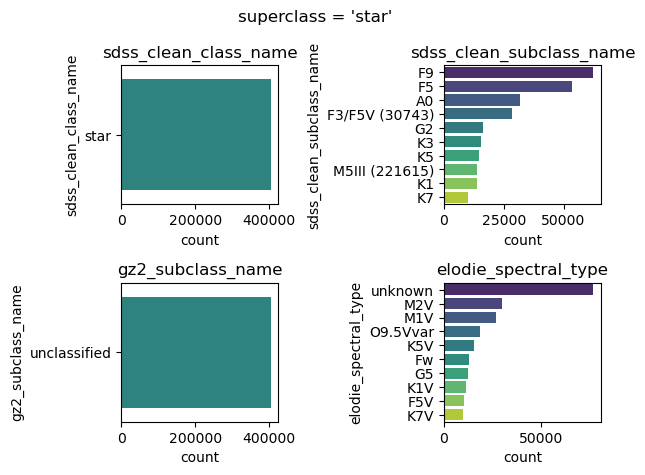

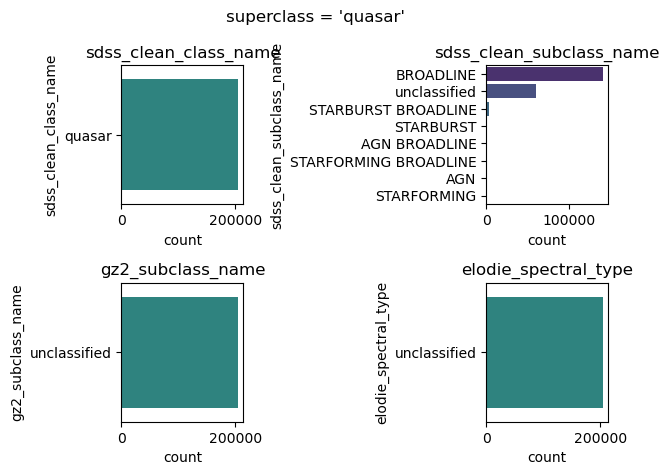

In [65]:
# investigate classes (categorical labels)

# create a helper function for investigating a column w/ categorical data
def investigate_classes(df, column):
    print(f"\n----------" + label + "----------")
    print(f"\tThe number of rows with empty values is: {df[column].isna().sum()}")
    print(f"\tThe number of unique labels is: {len(df[column].unique())}")
    print(f"\tThe % of the most common labels for column: {100 * df[column].value_counts().head(10) / len(df[column])}")

# summarize label counts for each categorical data column
for label in object_class_labels:
    investigate_classes(sdss_full, label)

# create a helper function to plot the value counts of the top-10 labels for each categorical class
# in a subset of data (based on the sdss_clean_class_name)
def plot_categorical_counts(superclass=None):
    df = sdss_full
    if superclass:
        df = sdss_full[sdss_full['sdss_clean_class_name'] == superclass]
    fig, axes = plt.subplots(nrows=2, ncols=2)
    for i, ax in enumerate(axes.flatten()):
        data = df[object_class_labels[i]]
        sns.countplot(y=data, ax=ax, order=data.value_counts().index[:10], palette='viridis')
        ax.set_title(f"{object_class_labels[i]}")
    plt.suptitle(f"{superclass = }")
    plt.tight_layout()
    plt.show()

# plot the value counts of the top-10 labels for all and each categorical class
for label in [None] + sdss_full['sdss_clean_class_name'].unique().tolist():
    plot_categorical_counts(label)

Text(0.5, 1.0, 'Distribution of SDSS objects across the sky, by superclass')

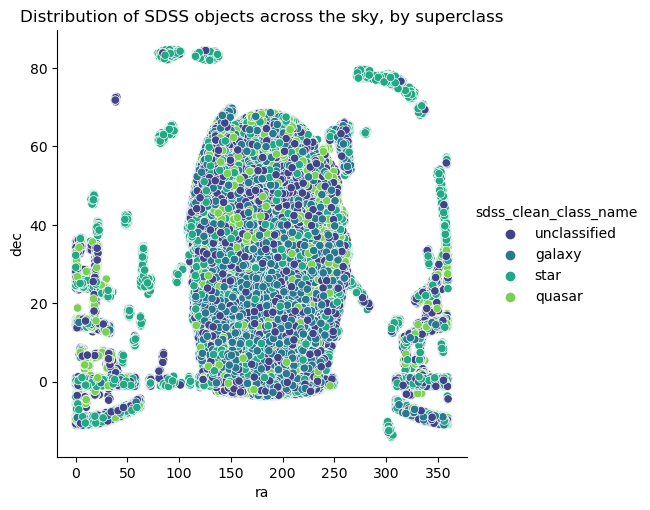

In [10]:
# investigate physical distribution of classes

sns.relplot(x='ra', y='dec', hue='sdss_clean_class_name', data=sdss_full.sample(frac=0.2), palette='viridis')
plt.title('Distribution of SDSS objects across the sky, by superclass')

In [11]:
# investigate histogram of 

# make a grid/superplot of dimension 2 x N/2, where
# N is the total number of columns in both object_filters and object_features, and where
# each subplot is a histogram of object counts across that column, which is color-shaded for each of the 4 superclasses
# see 'PCA-amit.ipynb' from Week 08
# and also consult ChatGPT



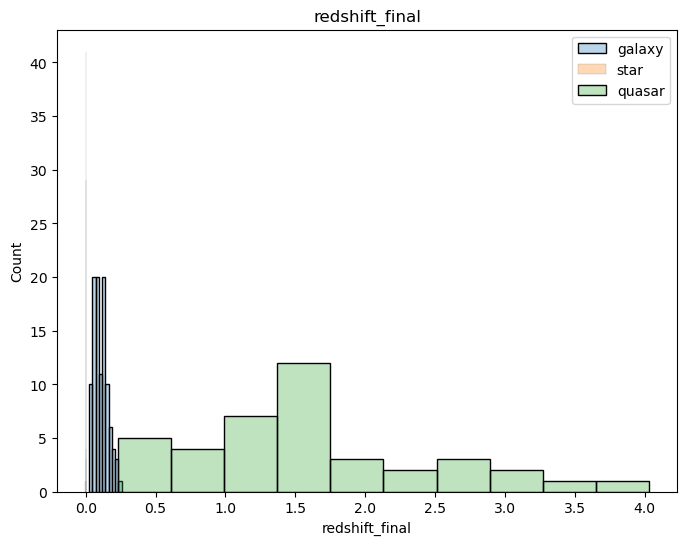

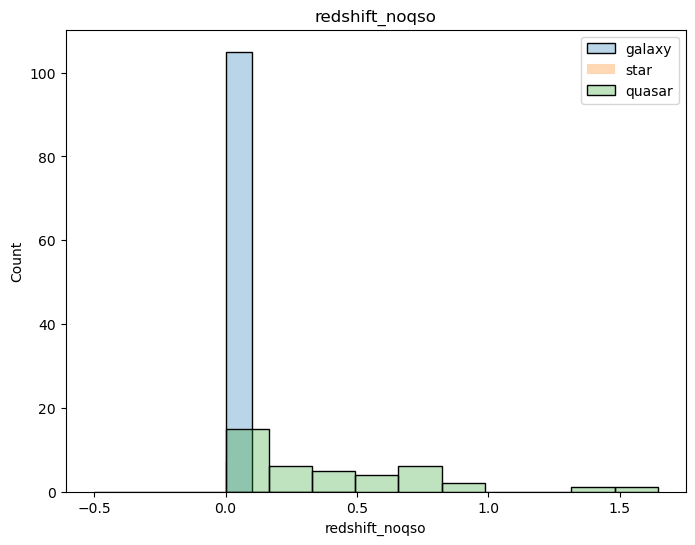

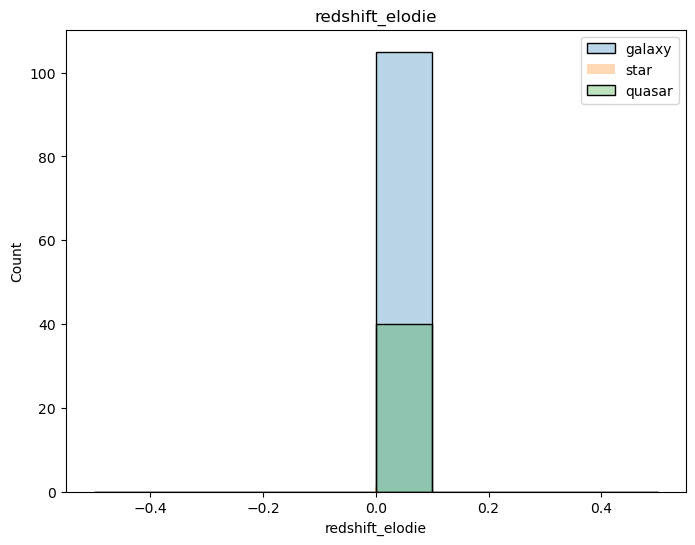

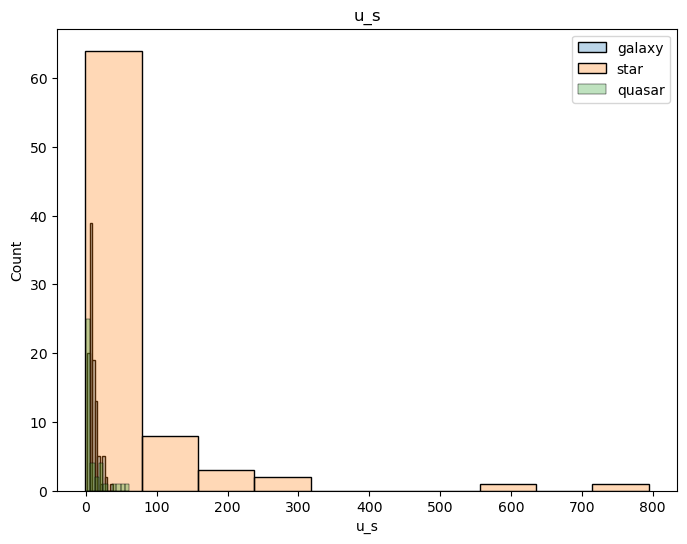

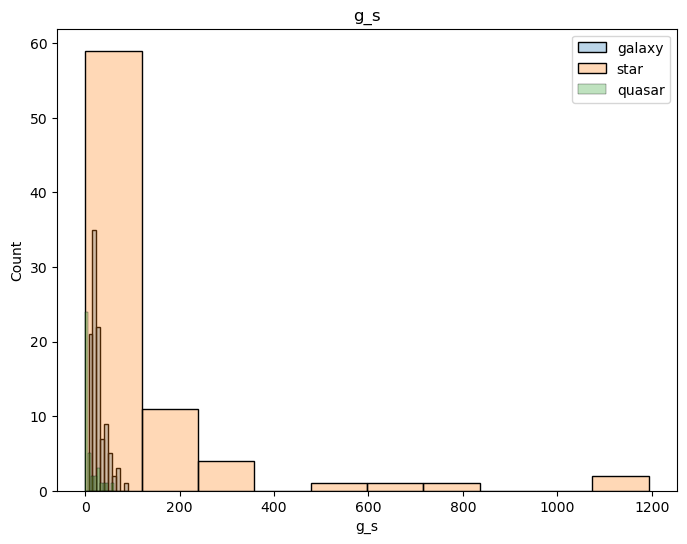

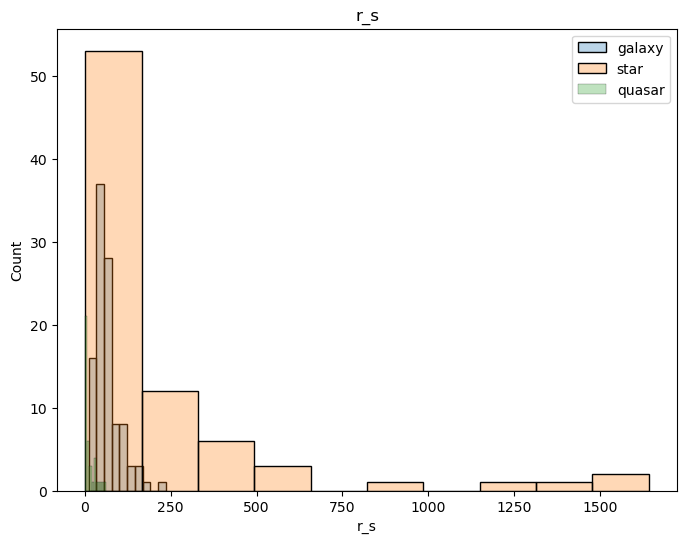

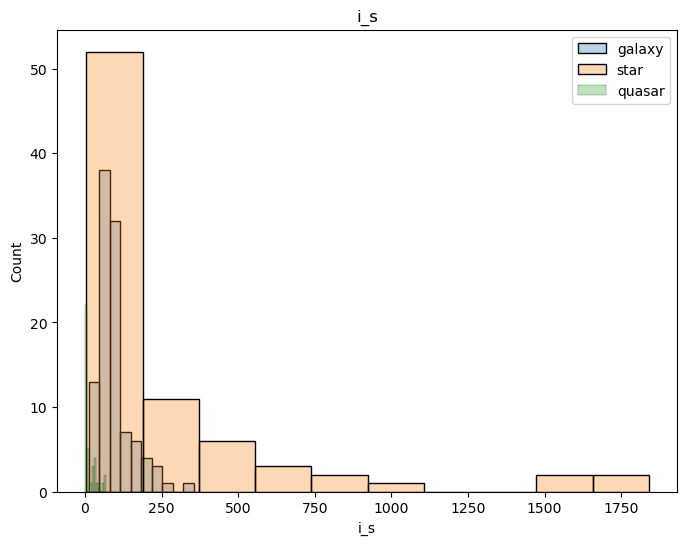

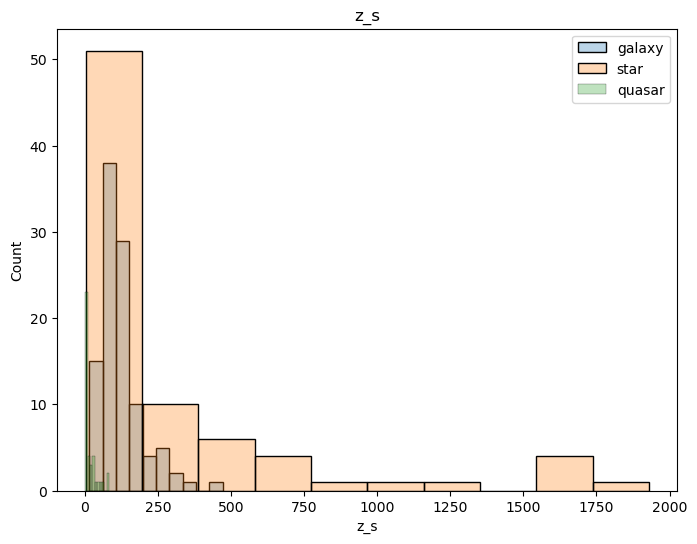

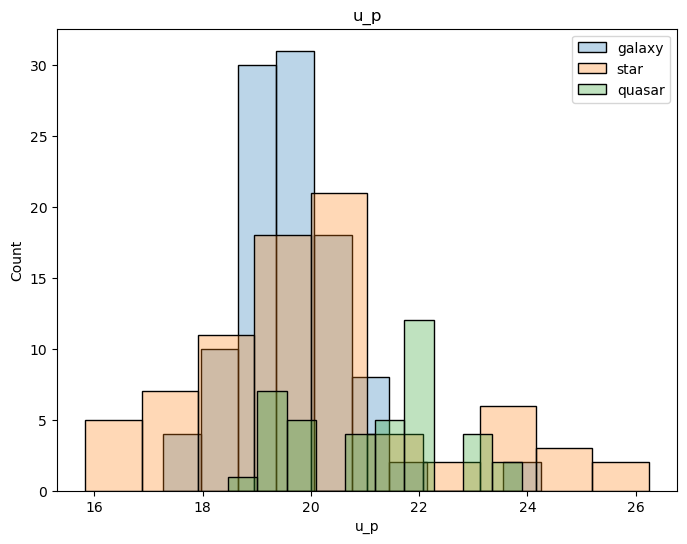

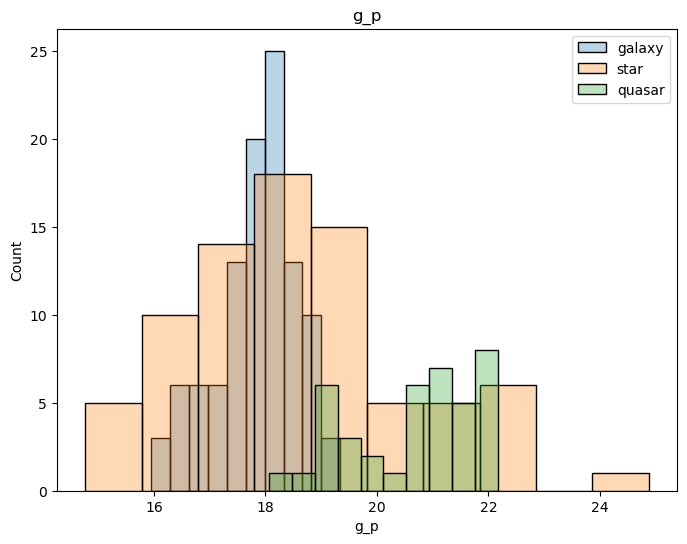

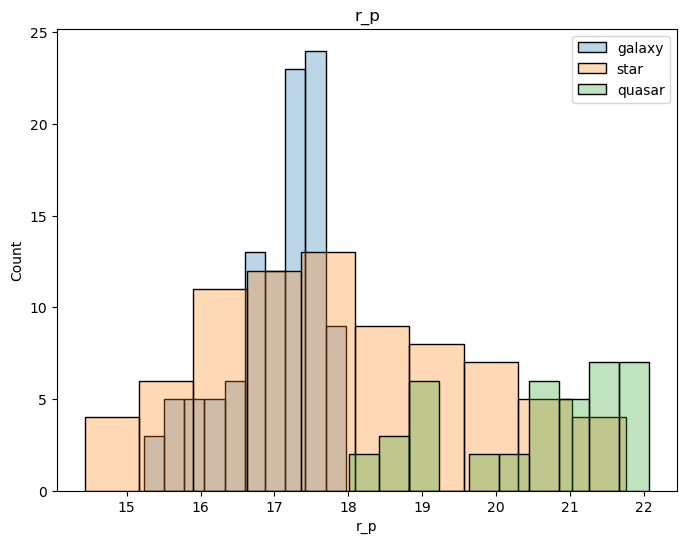

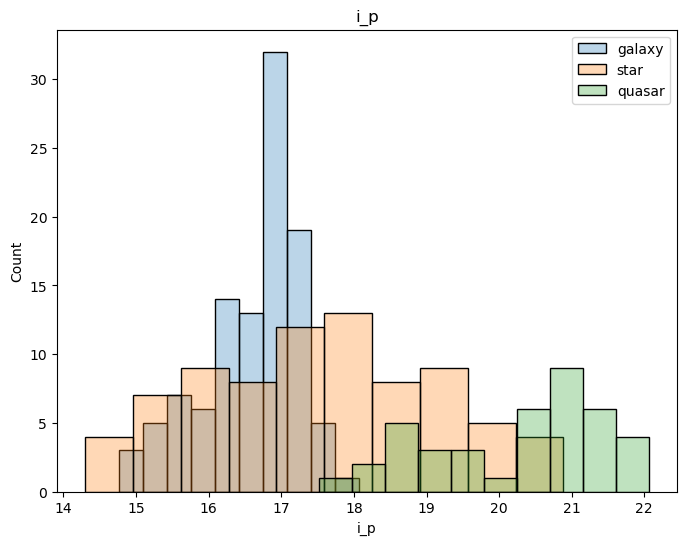

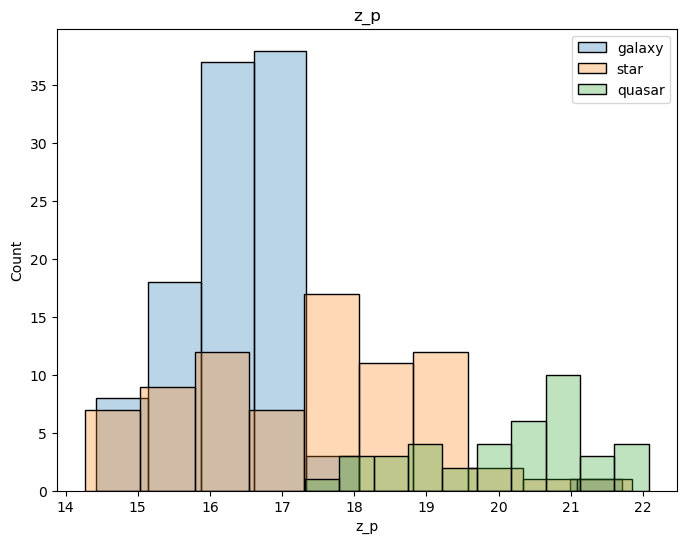

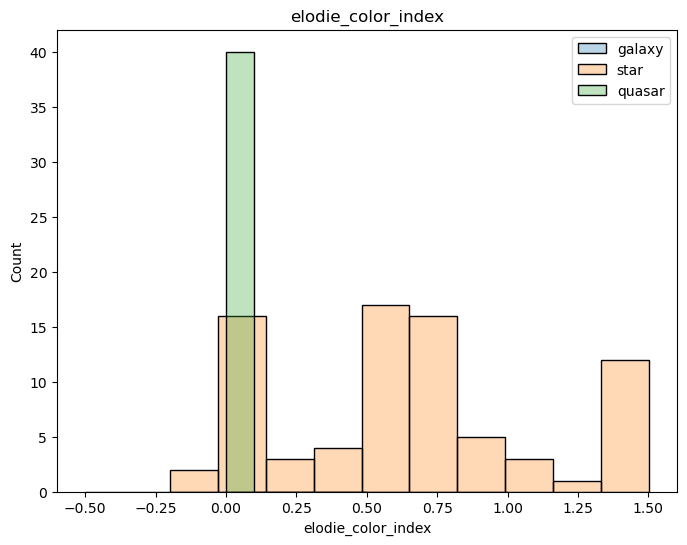

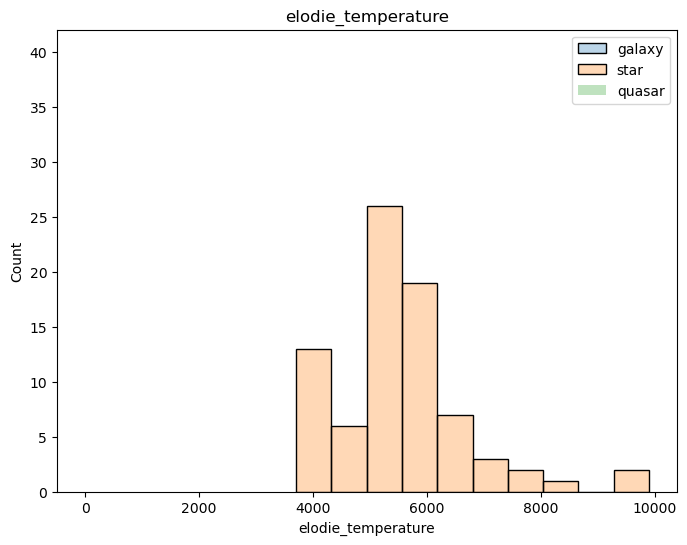

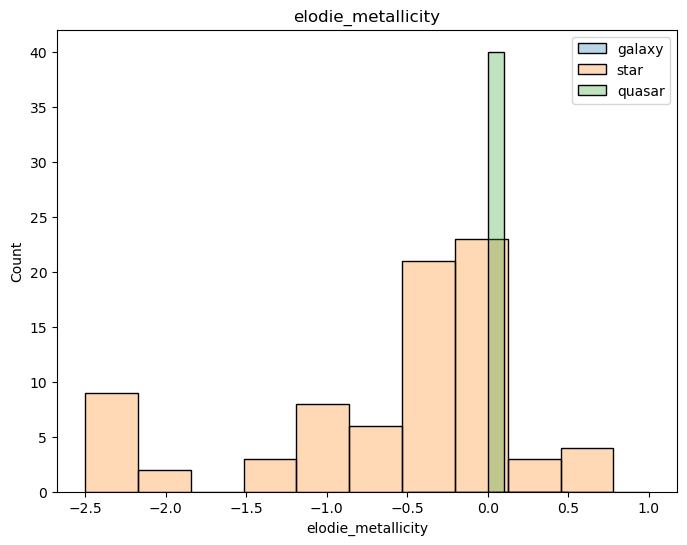

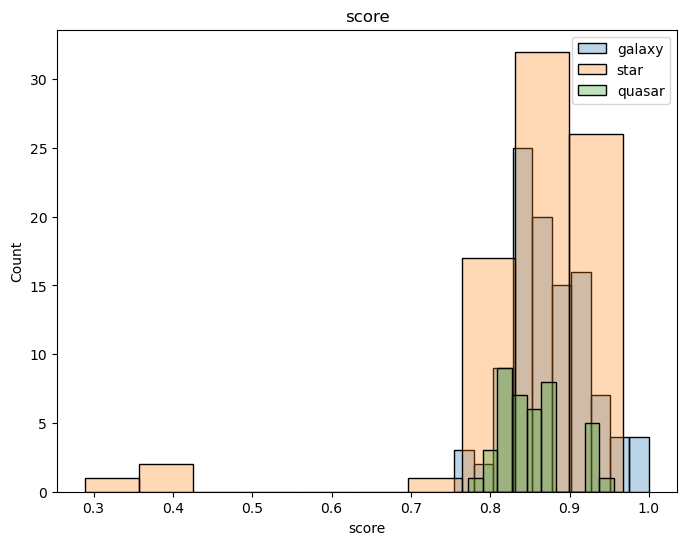

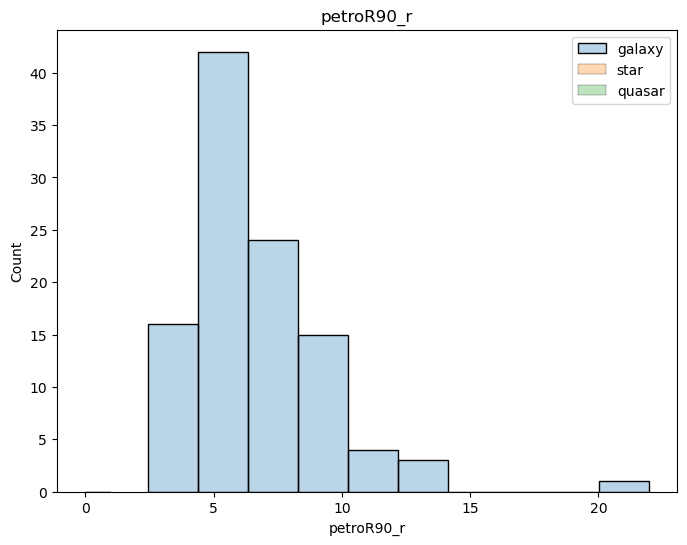

In [9]:
# investigate histograms of feature columns, color-shaded by superclass

# generate a subset dataframe
df = sdss_full[['sdss_clean_class_name'] + object_filters + object_features]
df = df.sample(frac=0.0002)
l1 = object_filters
l2 = object_features


# define classes
classes = df['sdss_clean_class_name'].unique()
classes = classes[classes != 'unclassified']

# 

# Set a color palette with distinct colors for each category
palette = sns.color_palette('husl', n_colors=len(df['sdss_clean_class_name'].unique()))

#color=sns.color_palette()[i]

# Iterate over columns and create separate plots
for col in l2 + l1:
    plt.figure(figsize=(8, 6))
    for class_label, color in zip(classes, palette):
        log_choice = True
        if df[df['sdss_clean_class_name'] == class_label][col].min() <= 0:
            log_choice = False
        sns.histplot(df[df['sdss_clean_class_name'] == class_label][col], bins=10, kde=False, \
            multiple='stack', label=class_label, common_norm=True, alpha=0.3, log_scale=False)
    plt.title(col)
    plt.legend()
    plt.show()

In [ ]:
# revise above block 
# plot each variable independently (i.e. not inside a loop)
# for each such plot, decide if it should be log or not
# for each such plot, decide if additional filtering should be applied (eg. only stars for elodie) and...
#        consider simultaneously dropping rows after validation (eg. extreme outliers)


In [ ]:
# investigate color_p vs. color_s and decide which to keep
# investigate linear combinations of color_x columns (eg. g_p-i_p or u_p*z_p)

In [ ]:
# consider dropping all 'unclassified' rows

In [ ]:
# generate label-simplification maps for subclasses, after inspecting label distributions
#       gz2_subclass_name
#           * consider flattening to the 12 main subclasses in the Hubble sequence
#       sdss_clean_subclass_name <--> elodie_spectral_type  (same system? matches? contradictions?)
#           * first identify the best column (or combination column)
#           * then consider flattening to one of the following:
#                   * one of the 7 spectral classes in the simple Morgan-Keenan system
#                   * one of the 10 spectral classes in the expanded M-K system (if the dataset includes D, S, and C)
#                   * one of the 70 (or 100) spectral+temperature classes in the expanded M-K system